# 0) Importando as bibliotecas

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ast import literal_eval

plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

# 1) Análise inicial e Medidas resumo

In [2]:
pokemon = pd.read_csv('pokemon.csv')

In [3]:
pokemon.shape

(801, 41)

In [4]:
pokemon.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [5]:
pokemon.describe()                        

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,defense,experience_growth,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,8.010000e+02,781.000000,801.000000,703.000000,801.000000,801.000000,801.000000,801.000000,781.000000,801.000000,801.000000
mean,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,1.034020,1.098002,1.208177,0.887016,0.975343,1.005306,1.250312,0.983458,1.058365,77.857678,7191.011236,65.362047,428.377029,73.008739,1.054996e+06,1.163892,68.958801,55.155761,401.000000,71.305868,70.911361,66.334582,61.378105,3.690387,0.087391
std,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,0.788896,0.738818,0.735356,0.266106,0.549375,0.495183,0.697148,0.500117,0.606562,32.158820,6558.220422,19.598948,119.203577,30.769159,1.602558e+05,1.080326,26.576015,20.261623,231.373075,32.353826,27.942501,28.907662,109.354766,1.930420,0.282583
min,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,0.000000,0.250000,0.000000,0.000000,0.000000,0.250000,0.250000,0.250000,5.000000,1280.000000,0.000000,180.000000,5.000000,6.000000e+05,0.100000,1.000000,0.000000,1.000000,10.000000,20.000000,5.000000,0.100000,1.000000,0.000000
25%,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,1.000000,0.500000,1.000000,1.000000,0.500000,0.500000,55.000000,5120.000000,70.000000,320.000000,50.000000,1.000000e+06,0.600000,50.000000,50.000000,201.000000,45.000000,50.000000,45.000000,9.000000,2.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,75.000000,5120.000000,70.000000,435.000000,70.000000,1.000000e+06,1.000000,65.000000,50.000000,401.000000,65.000000,66.000000,65.000000,27.300000,4.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,100.000000,6400.000000,70.000000,505.000000,90.000000,1.059860e+06,1.500000,80.000000,50.000000,601.000000,91.000000,90.000000,85.000000,64.800000,5.000000,0.000000
max,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,185.000000,30720.000000,140.000000,780.000000,230.000000,1.640000e+06,14.500000,255.000000,100.000000,801.000000,194.000000,230.000000,180.000000,999.900000,7.000000,1.000000


In [6]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

In [7]:
pokemon.describe(include = object)        # Medidas resumo para variáveis categóricas

,abilities,capture_rate,classfication,japanese_name,name,type1,type2
count,801,801,801,801,801,801,417
unique,482,34,588,801,801,18,18
top,['Levitate'],45,Dragon Pokémon,Fushigidaneフシギダネ,Bulbasaur,water,flying
freq,29,250,8,1,1,114,95


In [8]:
pokemon.isnull().sum().sort_values(ascending = False)

type2                384
percentage_male       98
weight_kg             20
height_m              20
name                   0
capture_rate           0
classfication          0
defense                0
experience_growth      0
hp                     0
japanese_name          0
abilities              0
base_happiness         0
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
generation             0
base_total             0
base_egg_steps         0
against_bug            0
attack                 0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0


Observado a coluna "Non-Null Count" temos: 
1. variável **height_m** possui 20 valores faltantes 
2. variável **percentage_male** 98 valores faltantes 
3. variável **type2** possui 384 valores faltantes 
4. variável **weight_kg** possui 20 valores faltantes

Mas os valores faltantes para **percentage_male** se referem à pokemons que não possuem sexo.
Similarmente, provavelmente pokemons com a variável **type2** faltante se deve ao fato deles não possuirem um tipo secundário. Assim, vamos atribuir aos valores faltantes o valor de **'Genderless** e **'Unique'**

Observando a documentação dos dados e as tabela acimas, decidiu-se retirar algumas colunas da análise de dados:
1. abilities
2. japanese_name
3. pokedex_number
4. classfication

japanese_name e pokedex_number serão retirados pois os dados podem ser unicamente identificados pela variável 'name'.
classfication (classification) foi retirado pois é basicamente uma descrição dos pokemons.
Serão criadas algumas novas variáveis/features:
1. **num_abilities** : número de habilidades que cada pokemon tem; calculada a partir da variável **abilities**
2. **total** : quantidade total de dano recebido de todos os possíveis tipos de habilidades; obtidos a partir das 18 variáveis **against_** 

Além disso, analisando os valores faltantes das features peso e altura, temos que elas ocorrem em conjunto, ou seja sempre na mesma linha.

In [9]:
a = pokemon[pd.isnull(pokemon.height_m)].index
b = pokemon[pd.isnull(pokemon.weight_kg)].index
sum(a == b)

20

Checando os valores únicos nas variáveis categóricas: type1, type2, generation, is_legendary

In [10]:
for i in ['type1', 'type2', 'generation', 'is_legendary']:
    print(f"{i} : {list(pokemon[i].unique())} \n")

type1 : ['grass', 'fire', 'water', 'bug', 'normal', 'poison', 'electric', 'ground', 'fairy', 'fighting', 'psychic', 'rock', 'ghost', 'ice', 'dragon', 'dark', 'steel', 'flying'] 

type2 : ['poison', nan, 'flying', 'dark', 'electric', 'ice', 'ground', 'fairy', 'grass', 'fighting', 'psychic', 'steel', 'fire', 'rock', 'water', 'dragon', 'ghost', 'bug', 'normal'] 

generation : [1, 2, 3, 4, 5, 6, 7] 

is_legendary : [0, 1] 



Observando a tabela pokemon.info() observa-se que a variável **capture_rate** é uma string. No entanto, deveria ser um valor numérico. Vamos ver seus valores únicos:

In [11]:
pokemon.capture_rate.unique()

array(['45', '255', '120', '127', '90', '190', '75', '235', '150', '25',
       '170', '50', '200', '100', '180', '60', '225', '30', '35', '3',
       '65', '70', '125', '205', '155', '145', '130', '140', '15', '220',
       '160', '80', '55', '30 (Meteorite)255 (Core)'], dtype=object)

In [12]:
pokemon.loc[pokemon.capture_rate == '30 (Meteorite)255 (Core)']

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
773,['Shields Down'],0.5,1.0,1.0,2.0,1.0,1.0,0.5,0.5,1.0,1.0,0.0,2.0,0.5,0.5,1.0,2.0,2.0,2.0,100,6400,70,500,30 (Meteorite)255 (Core),Meteor Pokémon,60,1059860,0.3,60,Metenoメテノ,Minior,NaN,774,100,60,120,rock,flying,40.0,7,0


 Então, temos que um pokemon tem 2 taxas de captura e essa taxa depende da forma em que esse pokemon está. Logo, vamos substituir essa linha por 2 outras linhas **Minior Meteorite** e **Minior Core** com **capture_rate** iguais à 30 e 255, respectivamente. E, a partir disso, podemos transformar essa coluna em variável numérica.

# 2) Preparação dos dados

In [13]:
# Criando o DataFrame que será manipulado
df = pokemon.copy()

## 2.1) Criando as novas linhas

In [14]:
# Criando a linha do Minior Meteorite
index = pokemon.loc[pokemon.capture_rate == '30 (Meteorite)255 (Core)'].index.item()
df.at[index,  'capture_rate'] = '30'
df.at[index, 'name'] = 'Minior Meteorite'

# Criando a linha do Minior Core
df.loc[-1] = df.loc[index]
df.at[-1,  'capture_rate'] = '250'
df.at[-1, 'name'] = 'Minior Core'

df

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,5,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,0.25,1.0,1.0,0.5,0.0,0.5,0.5,0.5,0.5,181,30720,0,570,255,Drawn Sword Pokémon,131,1250000,0.3,59,Kamiturugiカミツルギ,Kartana,NaN,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,0.50,1.0,2.0,1.0,1.0,0.0,1.0,1.0,0.5,101,30720,0,570,15,Junkivore Pokémon,53,1250000,5.5,223,Akuzikingアクジキング,Guzzlord,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,1.00,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,107,30720,0,600,3,Prism Pokémon,101,1250000,2.4,97,Necrozmaネクロズマ,Necrozma,NaN,800,127,89,79,psychic,NaN,230.0,7,1
800,['Soul-Heart'],0.25,0.5,0.0,1.0,0.5,1.0,2.0,0.5,1.0,0.50,2.0,0.5,0.5,0.0,0.5,0.5,1.0,1.0,95,30720,0,600,3,Artificial Pokémon,115,1250000,1.0,80,Magearnaマギアナ,Magearna,NaN,801,130,115,65,steel,fairy,80.5,7,1


In [15]:
# Transformando a coluna capture_rate em variável numérica
df['capture_rate'] = pd.to_numeric(df['capture_rate'])

## 2.2) Criando a variável num_abilities

In [55]:
df['num_abilities'] = pokemon['abilities'].map(literal_eval).map(len)
df.num_abilities.unique()

array([ 2.,  1.,  3.,  6.,  4., nan])

## 2.3) Criando a variável total

In [17]:
df.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary', 'num_abilities'],
      dtype='object')

In [18]:
df['Total'] = df[['against_bug', 'against_dark', 'against_dragon', 'against_electric',
       'against_fairy', 'against_fight', 'against_fire', 'against_flying',
       'against_ghost', 'against_grass', 'against_ground', 'against_ice',
       'against_normal', 'against_poison', 'against_psychic', 'against_rock',
       'against_steel', 'against_water']].sum(axis = 1)

In [19]:
df.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary', 'num_abilities', 'Total'],
      dtype='object')

## 2.4) Atribuindo valores aos missing values

In [20]:
df['percentage_male'].fillna('Genderless', inplace = True)
df['type2'].fillna('Unique', inplace = True)

df['height_m'].fillna(df['height_m'].median(), inplace = True)
df['weight_kg'].fillna(df['weight_kg'].median(), inplace = True)

## 2.5) Seleção das colunas

In [21]:
df.drop(['abilities', 'japanese_name', 'pokedex_number', 'classfication', 'percentage_male'], axis = 1, inplace = True)

In [22]:
df.columns

Index(['against_bug', 'against_dark', 'against_dragon', 'against_electric',
       'against_fairy', 'against_fight', 'against_fire', 'against_flying',
       'against_ghost', 'against_grass', 'against_ground', 'against_ice',
       'against_normal', 'against_poison', 'against_psychic', 'against_rock',
       'against_steel', 'against_water', 'attack', 'base_egg_steps',
       'base_happiness', 'base_total', 'capture_rate', 'defense',
       'experience_growth', 'height_m', 'hp', 'name', 'sp_attack',
       'sp_defense', 'speed', 'type1', 'type2', 'weight_kg', 'generation',
       'is_legendary', 'num_abilities', 'Total'],
      dtype='object')

# 3) Visualização de dados

## 3.1) Correlações lineares

Como temos muitas variáveis, vamos dividi-las em 2 grupos:
1. Skills de combate (combat_skills)
2. Atributos base (base_stats)

In [23]:
combat_skills = ['against_bug', 'against_dark', 'against_dragon', 'against_electric',
       'against_fairy', 'against_fight', 'against_fire', 'against_flying',
       'against_ghost', 'against_grass', 'against_ground', 'against_ice',
       'against_normal', 'against_poison', 'against_psychic', 'against_rock',
       'against_steel', 'against_water']

base_stats = ['attack', 'base_egg_steps',
       'base_happiness', 'base_total', 'capture_rate', 'defense',
       'experience_growth', 'height_m', 'hp', 'sp_attack',
       'sp_defense', 'speed', 'weight_kg', 'generation',
       'num_abilities', 'Total']

### Matriz de correlações de combat_skills

Text(0.5, 1.0, 'Skills de combate')

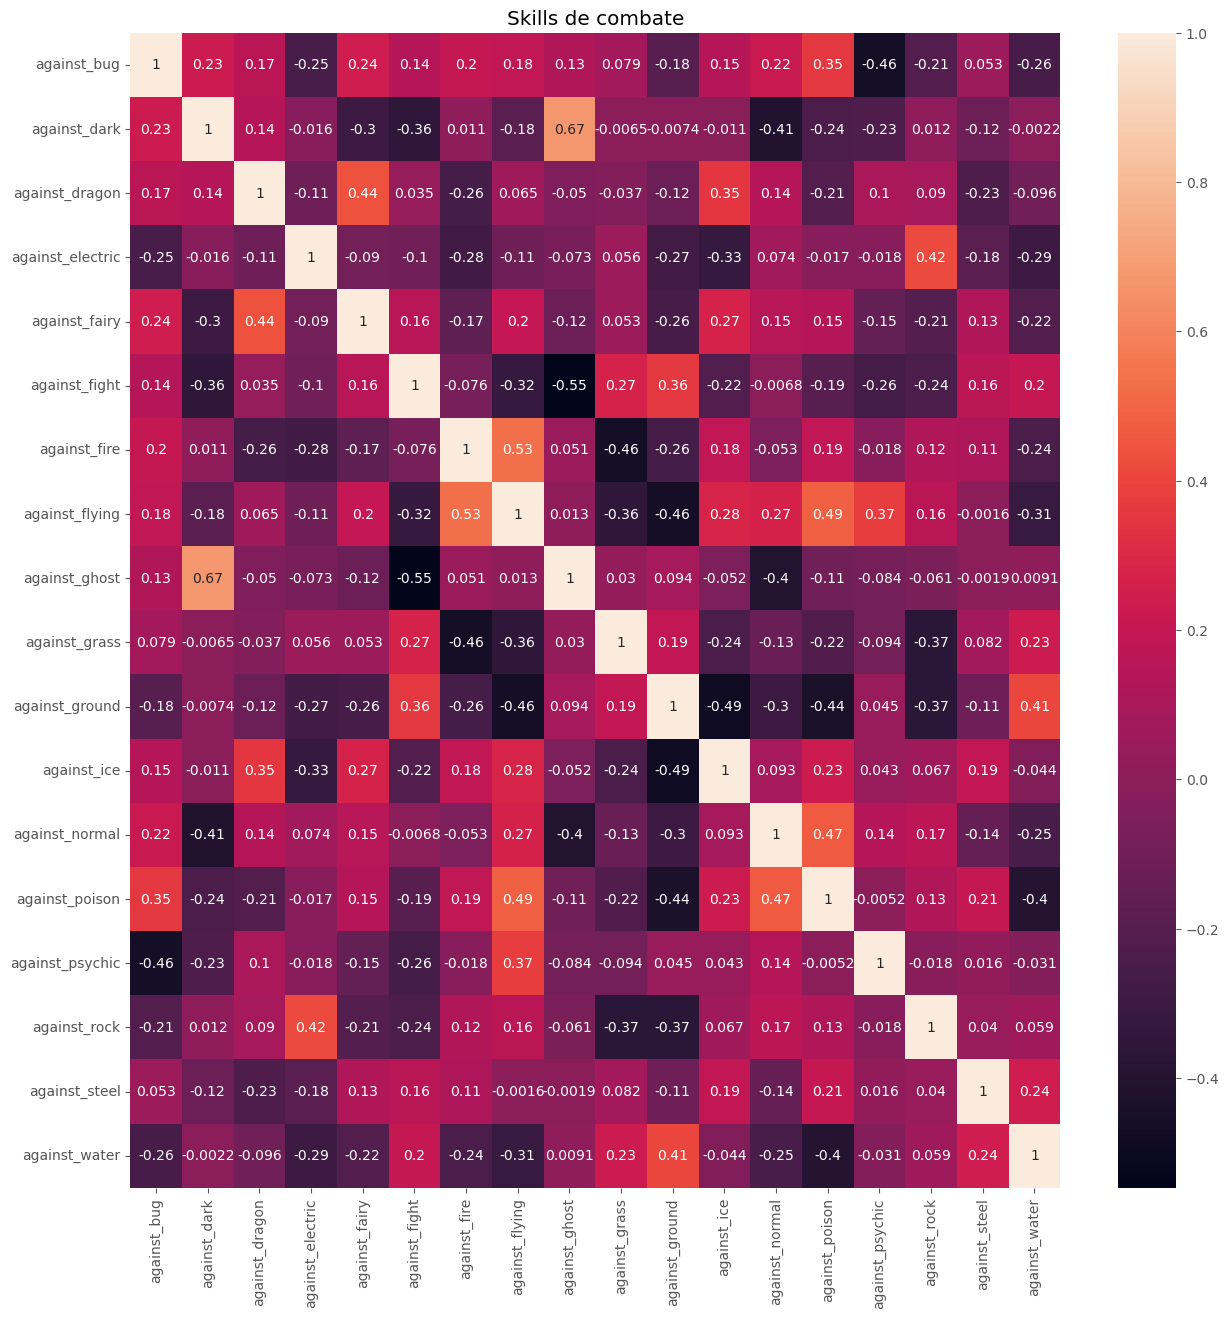

In [24]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df[combat_skills].corr(), annot=True).set_title("Skills de combate")

In [25]:
corr_mat1 = df[combat_skills].corr()
corr_pairs_1 = corr_mat1.unstack()
sorted_pairs_1 = corr_pairs_1.sort_values().drop_duplicates()

- Correlações lineares (positivas ou negativas) moderadas (0.5 < |r| < 0.7)

In [26]:
sorted_pairs_1[(sorted_pairs_1.abs() > 0.5) & (sorted_pairs_1.abs() < 0.7)]

against_fight  against_ghost    -0.546982
against_fire   against_flying    0.528729
against_dark   against_ghost     0.672325
dtype: float64

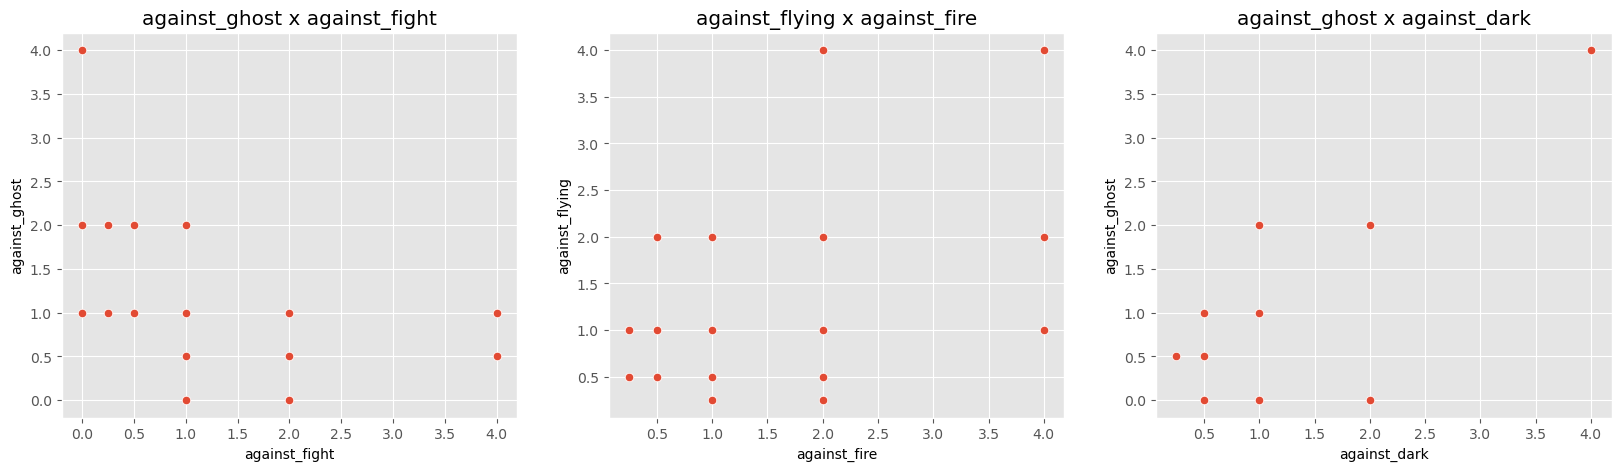

In [27]:
fig,axes = plt.subplots(1,3,figsize=(20,5),sharey = False)

sns.scatterplot(x = df['against_fight'], y = df['against_ghost'] ,ax=axes[0])
axes[0].set_title("against_ghost x against_fight")

sns.scatterplot(x = df['against_fire'], y = df['against_flying'] ,ax=axes[1])
axes[1].set_title("against_flying x against_fire")



sns.scatterplot(x = df['against_dark'], y = df['against_ghost'] ,ax=axes[2])
axes[2].set_title("against_ghost x against_dark")

plt.show()

- Correlações lineares (positivas ou negativas) fortes (|r| > 0.7)

In [28]:
sorted_pairs_1[(sorted_pairs_1.abs() > 0.7) & (sorted_pairs_1.abs() < 0.9)]

Series([], dtype: float64)

Logo, pelos gráficos de dispersão e pelos coeficientes de correlação linear, parece haver uma relação inversamente proporcional entre against_ghost e against_first, e uma relação linear positiva entre against_flying e against_fire, assim como against_ghost e against_dark.

### Matriz de correlações de base_stats

Text(0.5, 1.0, 'Skills base')

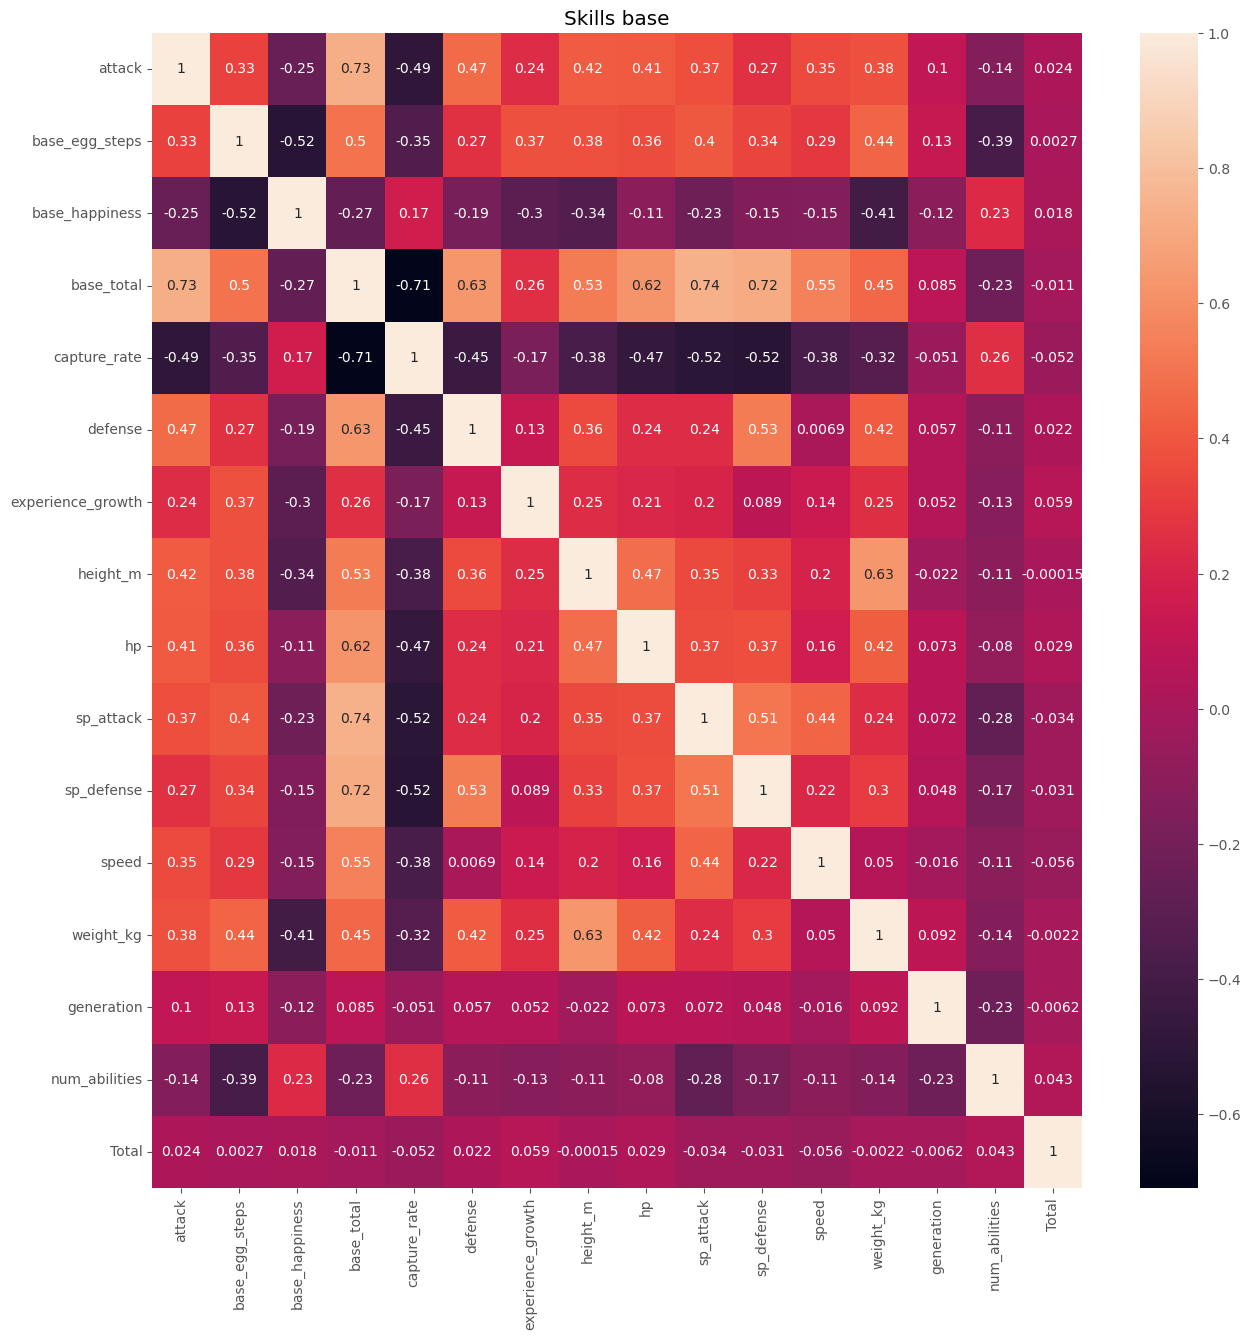

In [29]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df[base_stats].corr(), annot=True).set_title("Skills base")

In [30]:
corr_mat2 = df[base_stats].corr()
corr_pairs_2 = corr_mat2.unstack()
sorted_pairs_2 = corr_pairs_2.sort_values().drop_duplicates()

- Correlações lineares (positivas ou negativas) moderadas (0.5 < |r| < 0.7)

In [31]:
sorted_pairs_2[(sorted_pairs_2.abs() > 0.5) & (sorted_pairs_2.abs() < 0.7)]

base_happiness  base_egg_steps   -0.524563
capture_rate    sp_defense       -0.522251
                sp_attack        -0.516961
sp_attack       sp_defense        0.510764
defense         sp_defense        0.526446
base_total      height_m          0.528910
                speed             0.547758
                hp                0.620187
height_m        weight_kg         0.626719
base_total      defense           0.629091
dtype: float64

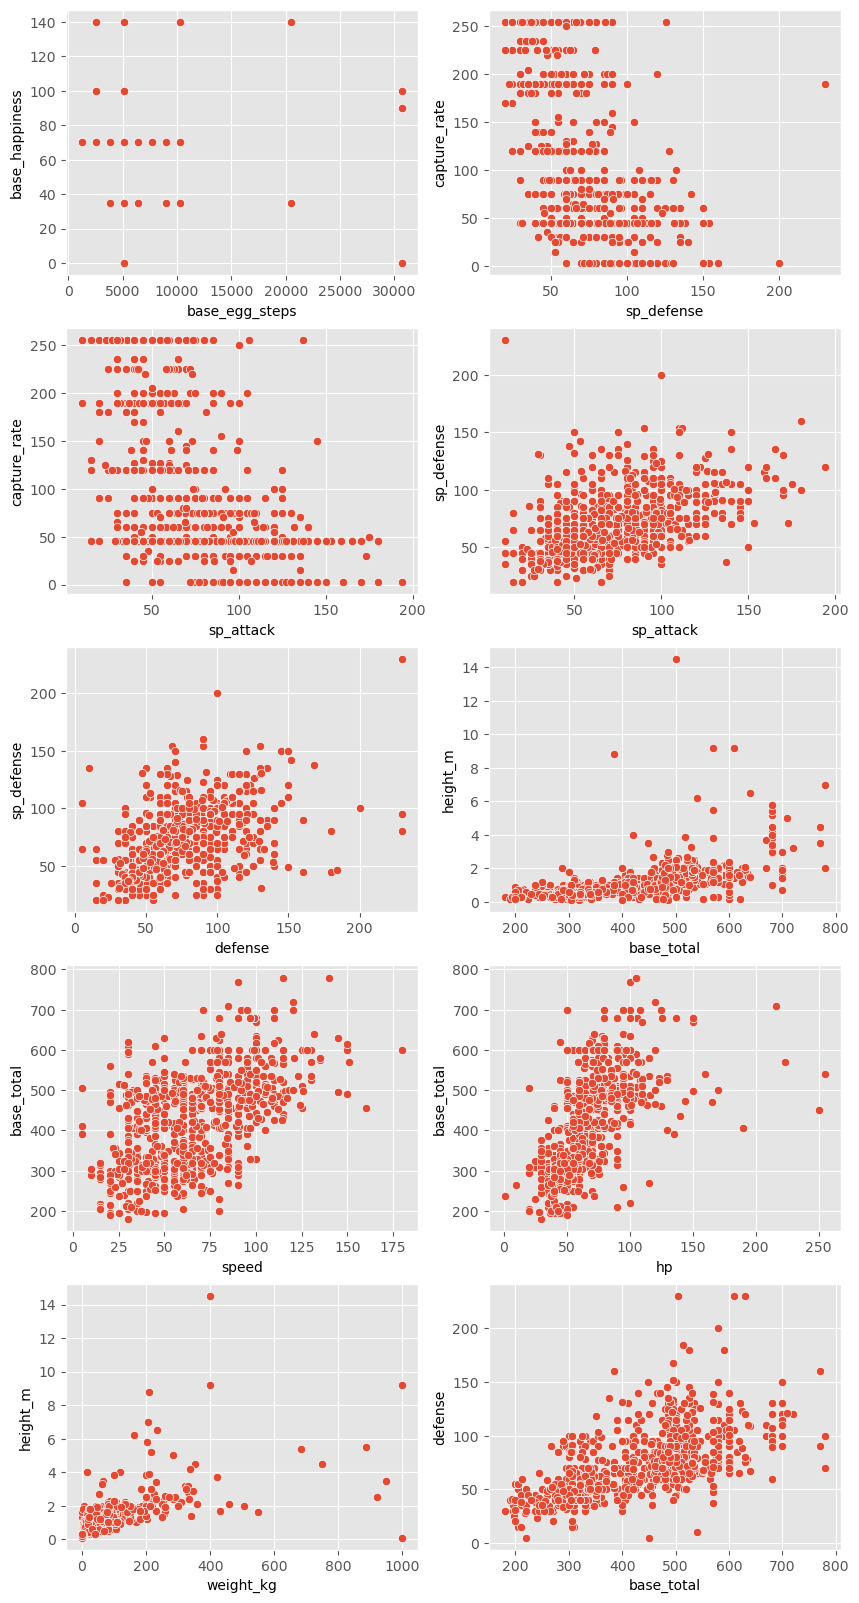

In [32]:
fig,axes = plt.subplots(5,2,figsize=(10,20),sharey = False)

sns.scatterplot(x = df['base_egg_steps'], y = df['base_happiness'] ,ax=axes[0,0])

sns.scatterplot(x = df['sp_defense'], y = df['capture_rate'] ,ax=axes[0,1])

sns.scatterplot(x = df['sp_attack'], y = df['capture_rate'] ,ax=axes[1,0])

sns.scatterplot(x = df['sp_attack'], y = df['sp_defense'] ,ax=axes[1,1])

sns.scatterplot(x = df['defense'], y = df['sp_defense'] ,ax=axes[2,0])

sns.scatterplot(x = df['base_total'], y = df['height_m'] ,ax=axes[2,1])

sns.scatterplot(x = df['speed'], y = df['base_total'] ,ax=axes[3,0])

sns.scatterplot(x = df['hp'], y = df['base_total'] ,ax=axes[3,1])

sns.scatterplot(x = df['weight_kg'], y = df['height_m'] ,ax=axes[4,0])

sns.scatterplot(x = df['base_total'], y = df['defense'] ,ax=axes[4,1])



plt.show()

Observando os gráficos de dispersão e os coeficientes de correlação linear, os dados indicam que:
1. capture_rate e sp_defense possuem uma relação linear negativa
2. sp_attack e sp_defense possuem uma relação linear positiva
3. sp_defense e defense possuem uma relação linear positiva
4. base_total e speed possuem uma relação linear positiva
5. base_total e hp possuem uma relação linear positiva
6. defense e base_total possuem uma relação linear positiva

- Correlações lineares (positivas ou negativas) fortes (|r| > 0.7)

In [33]:
sorted_pairs_2[(sorted_pairs_2.abs() > 0.7) & (sorted_pairs_2.abs() < 0.9)]

base_total  capture_rate   -0.708886
sp_defense  base_total      0.716911
base_total  attack          0.730270
sp_attack   base_total      0.741255
dtype: float64

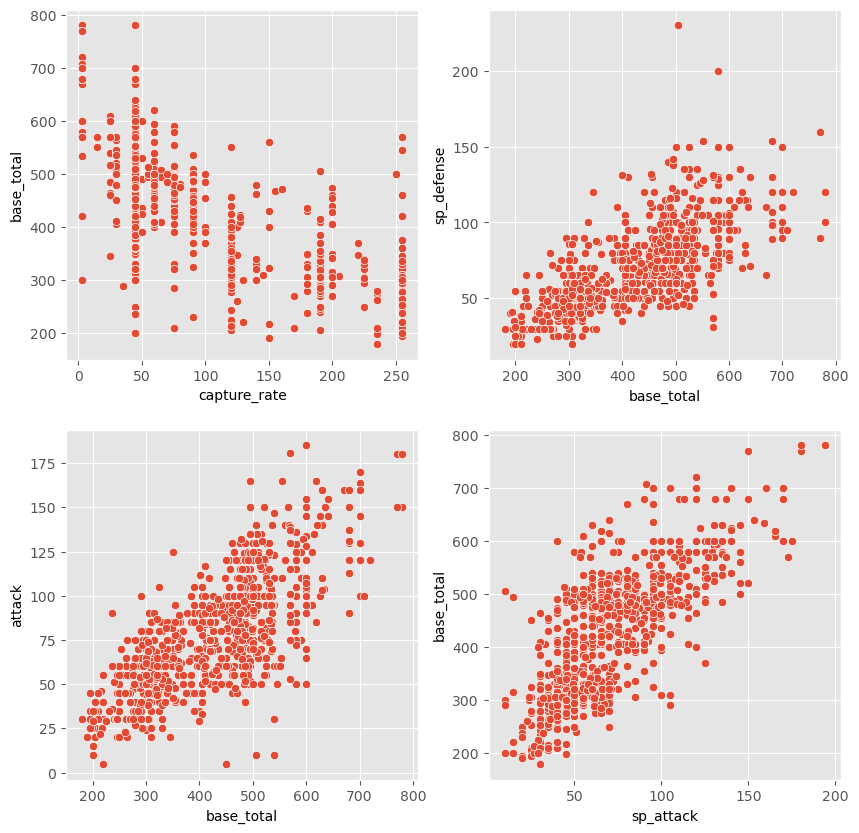

In [34]:
fig,axes = plt.subplots(2,2,figsize=(10,10),sharey = False)

sns.scatterplot(x = df['capture_rate'], y = df['base_total'] ,ax=axes[0,0])

sns.scatterplot(x = df['base_total'], y = df['sp_defense'] ,ax=axes[0,1])

sns.scatterplot(x = df['base_total'], y = df['attack'] ,ax=axes[1,0])

sns.scatterplot(x = df['sp_attack'], y = df['base_total'] ,ax=axes[1,1])

plt.show()

Observando os gráficos de dispersão e os coeficientes de correlação linear, os dados indicam que:

1. capture_rate e base_total possuem uma relação linear negativa
2. sp_defense e base_total possuem uma relação linear positiva
3. attack e base_total possuem uma relação linear positiva
4. base_total e sp_attack possuem uma relação linear positiva

## 3.2) Análise por geração

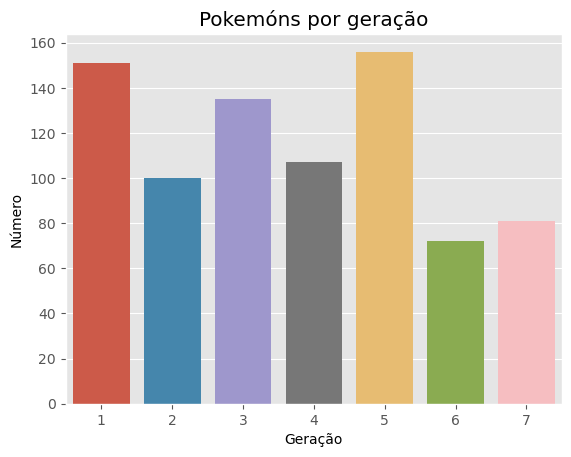

In [35]:
plot = sns.countplot(x = df['generation'])
plot.set_title("Pokemóns por geração")
plot.set(xlabel = "Geração", ylabel = "Número")
plt.show()

- Temos mais pokemóns na geração 1 e 5. E as gerações pares possuem menos pokemóns que as gerações ímpares.

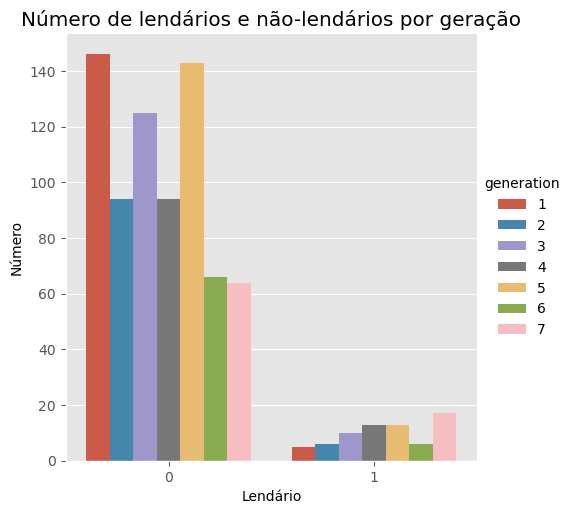

In [80]:
plot = sns.catplot(data=df, x='is_legendary', hue='generation', kind='count').set(title = "Número de lendários e não-lendários por geração")
plt.xlabel("Lendário")
plt.ylabel("Número")
plt.show()

- Geração 7 possui maior número de pokemóns lendários embora menor número de pokemóns comuns
- Geração 1 possui menor número de pokemóns lendários embora maior número de pokemóns comuns

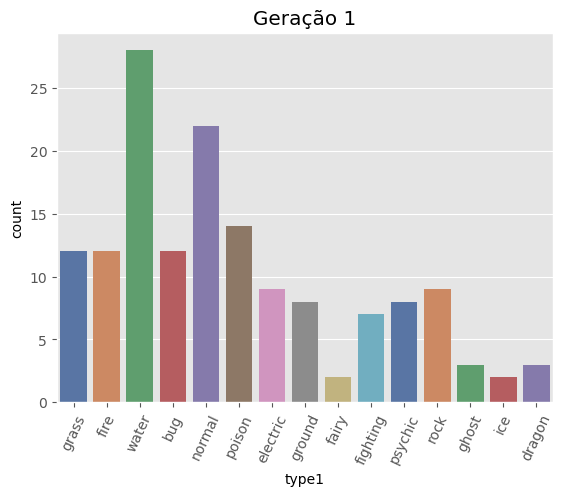

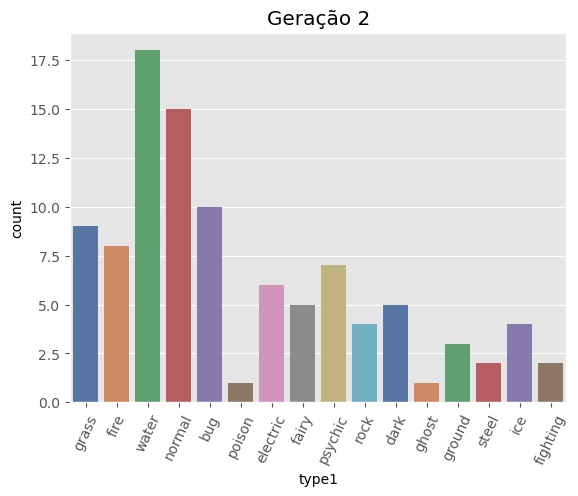

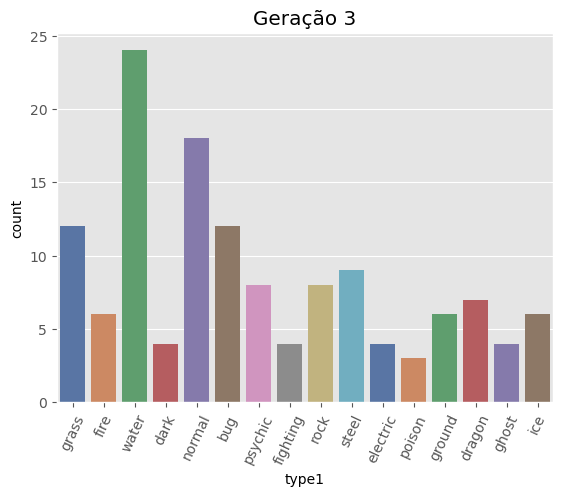

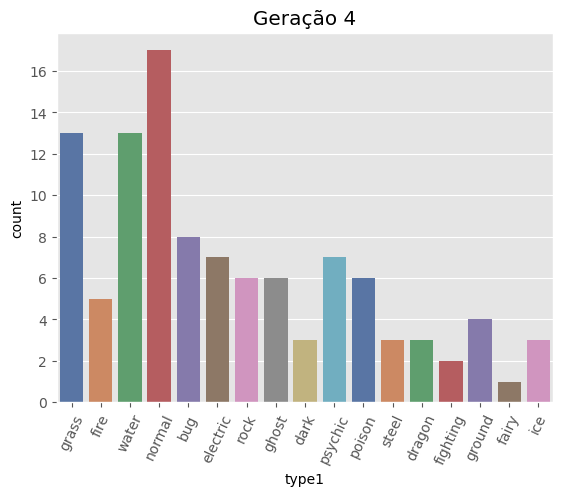

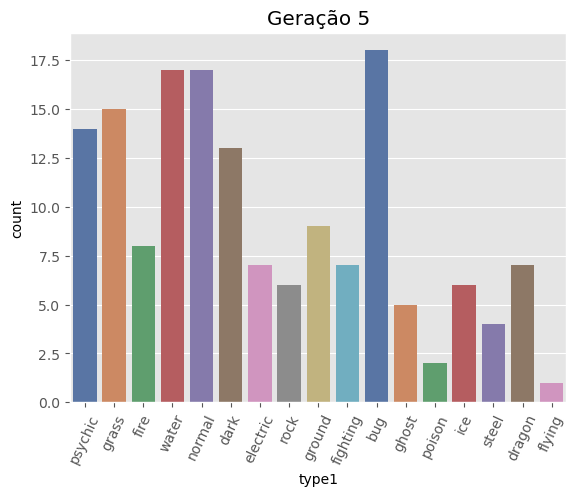

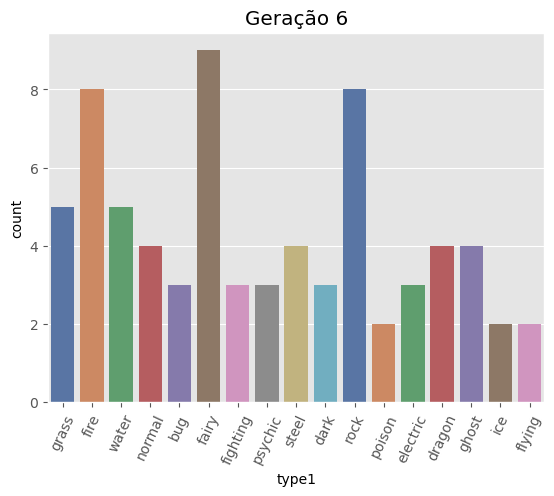

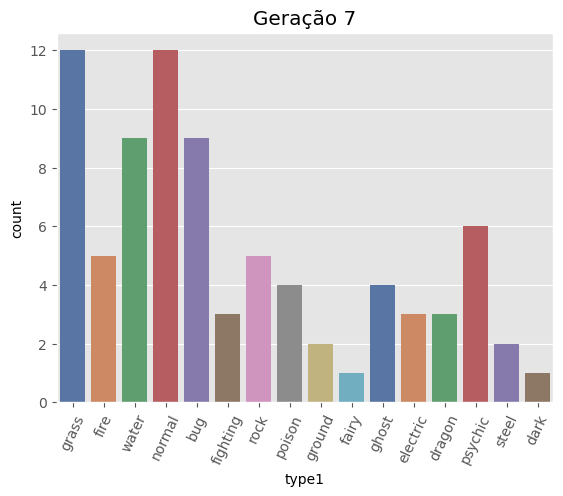

In [37]:
gp = df.groupby('generation')['type1'].value_counts()

for i in range(1,8):
    sns.countplot(data = df.loc[df.generation == i], x='type1', palette = 'deep').set(title = f'Geração {i}')
    plt.xticks(rotation=65)
    plt.show()

- Tipo água é predominante nas gerações 1, 2 e 3
- Tipo normal é predominante na geração 4
- Tipo inseto é predominante na geração 5
- Tipo fada é predominante na geração 6
- Tipo grama e tipo normal empatados na geração 7

### Gráfico de médias para as variáveis de combate base por geração

In [102]:
#sns.lineplot(data = df, x = 'generation', y = '')
atributos = ['attack','base_total', 'defense', 'hp', 'speed', 'generation']
medias = df[atributos].groupby('generation').mean()
display(medias)

,attack,base_total,defense,hp,speed
generation,,,,,
1,74.529801,416.251656,70.079470,64.344371,70.152318
2,69.960000,413.180000,71.790000,70.980000,61.610000
3,77.185185,420.022222,72.637037,65.666667,63.577778
4,82.672897,451.177570,76.168224,73.102804,70.074766
5,80.557692,427.038462,71.961538,70.314103,66.519231
6,76.527778,437.611111,73.555556,71.111111,66.652778
7,84.827160,448.802469,77.790123,70.444444,64.728395


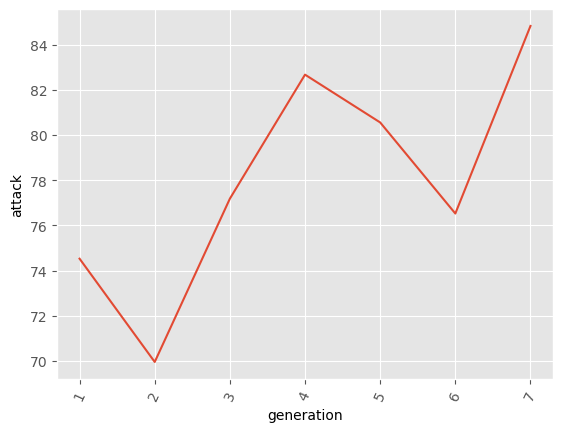

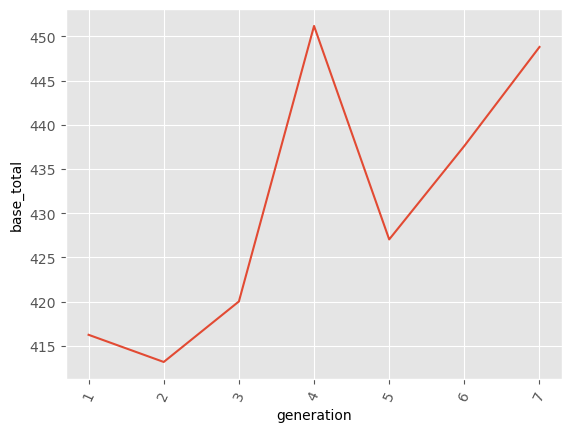

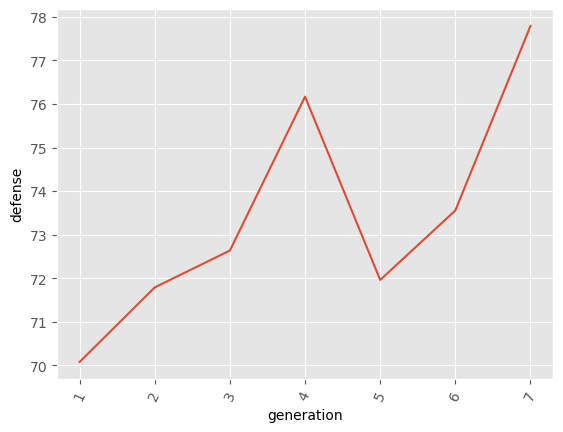

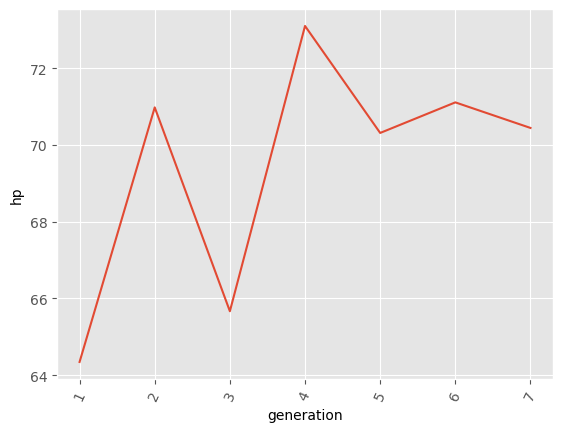

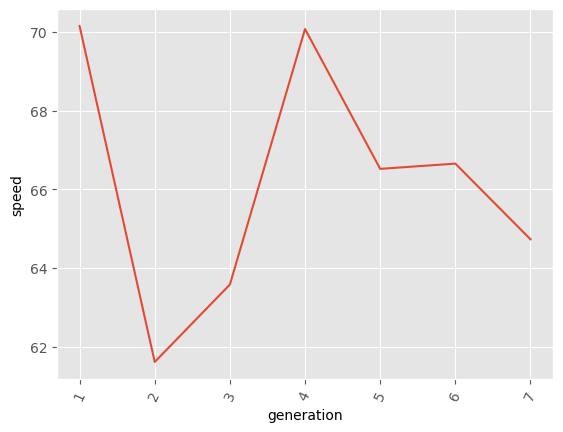

In [103]:

for feature in atributos[:-1]:
    sns.lineplot(data=medias, x=medias.index, y=feature)
    plt.xticks(rotation=65)
    plt.show()

- Nota-se um tendência linear crescente nos atributos de combate base dos Pokemóns com o passar das gerações, indicando que pokemóns de gerações mais recentes são mais fortes

## 3.3) Relação entre peso, altura e as variáveis base dos Pokemóns

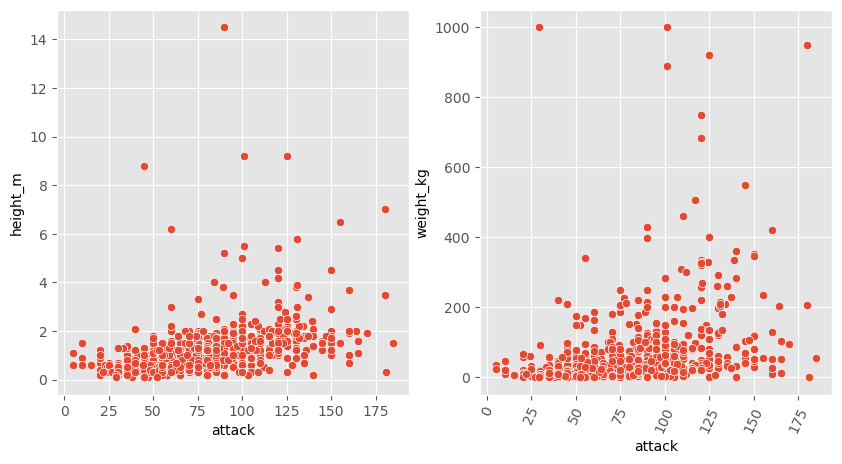

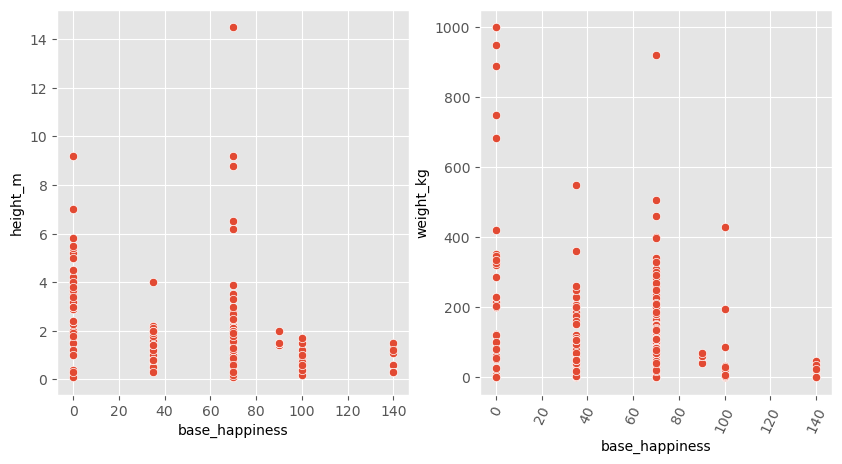

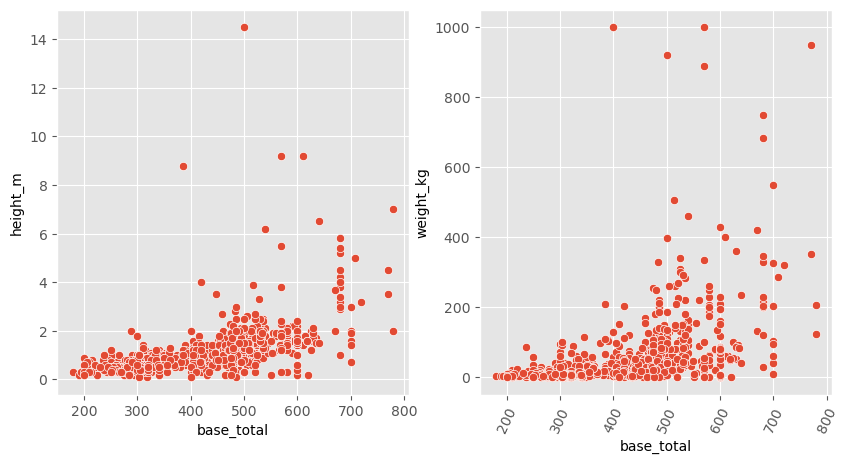

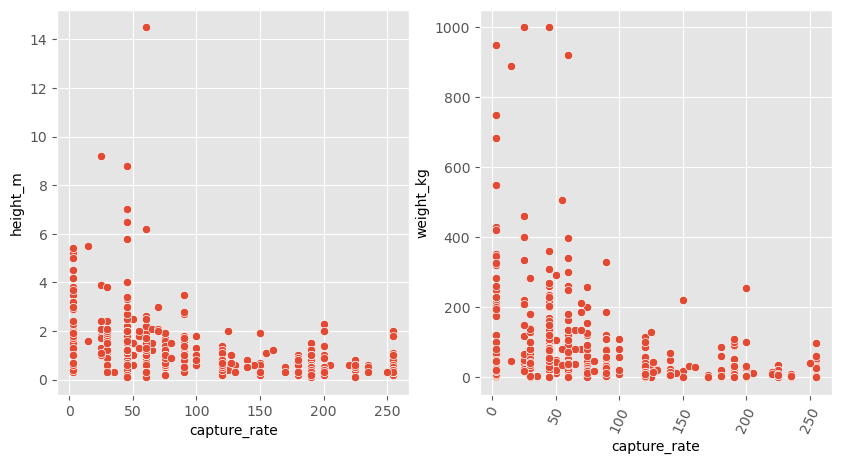

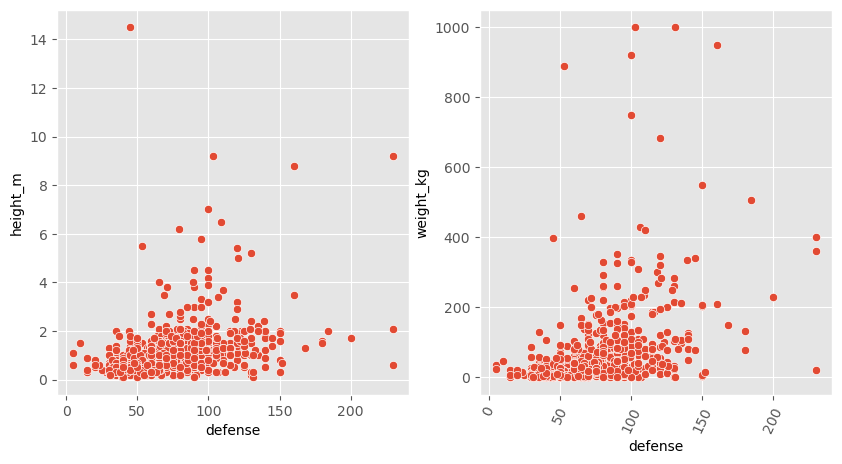

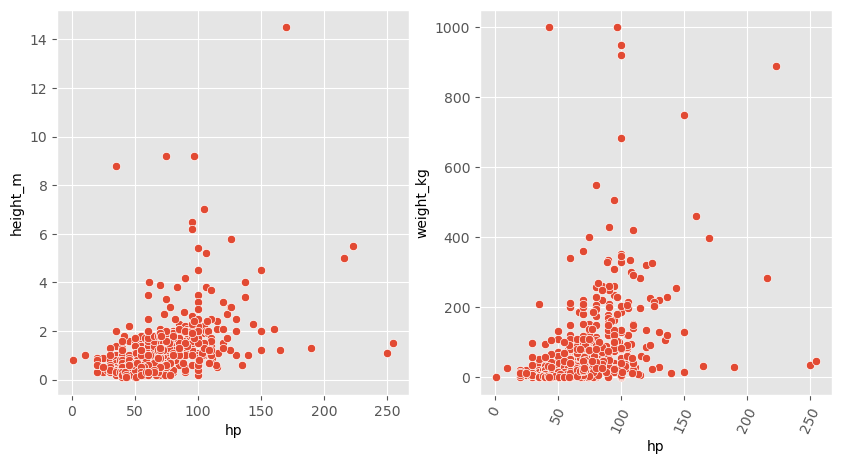

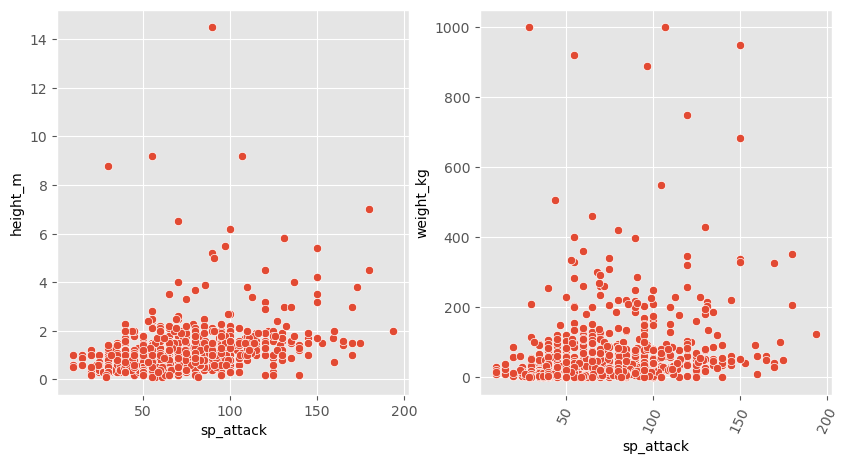

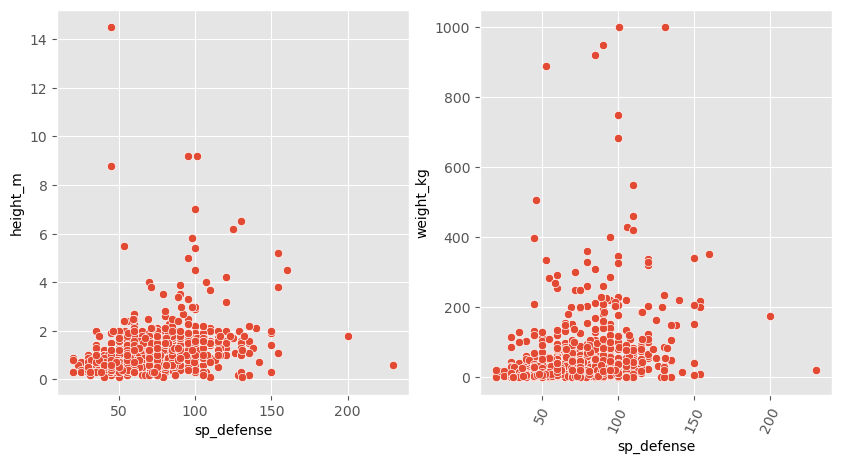

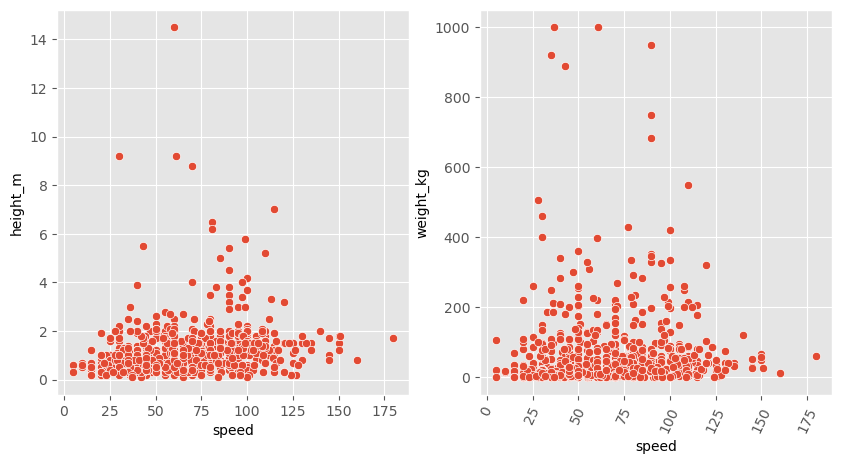

In [38]:
base = ['attack','base_happiness', 'base_total', 'capture_rate', 
        'defense', 'hp', 'sp_attack', 'sp_defense', 'speed']

for feature in base:
    fig, ax =plt.subplots(1,2, figsize=(10,5),sharey = False)
    sns.scatterplot(data=df, x=feature, y='height_m', ax=ax[0])
    plt.xticks(rotation=65)
    sns.scatterplot(data=df, x=feature, y='weight_kg', ax=ax[1])
    plt.xticks(rotation=65)
    plt.show()

 1. Peso/Altura e ataque base parecem ter uma relação linear positiva fraca (mas perceptível), o que faz sentido pois pokemóns mais pesados/altos geralmente possuem ataques mais potentes. Similarmente, isso também ocorre com peso/altura e defesa base já que peso/altura geralmente implica em uma resistência maior, logo uma defesa mais eficaz
 2. Peso (ou altura) e velocidade não apresenta uma correlação linear visível, no entanto parece indicar que há uma relação inversamente proporcional. Temos pokemóns com peso muito baixo (ou pequenos) e velocidades base muito altas, e pokemóns muito pesados (ou altos) com velocidades base muito baixas, talvez porque proporções corporais maiores dificultem a locomoção e diminuam a agilidade.
 3. Peso (ou altura) e hp, sp_attack, sp_defense, base_total também aparentam uma relação linear positiva similarmente às justificativas apresentadas em (1)
 4. Taxa de captura e Peso (altura) parecem ter uma relação linear negativa. Tal tendência segue de acordo com as expectativas uma vez que pokemóns mais pesados (ou maiores/altos) possuem estatísticas base mais altas, então eles são mais difíceis de se capturar

## 3.4) Pokemons mais fáceis de se capturar

Vamos criar boxplots para a taxa de captura (**capture_rate**) por tipo primário do Pokémon

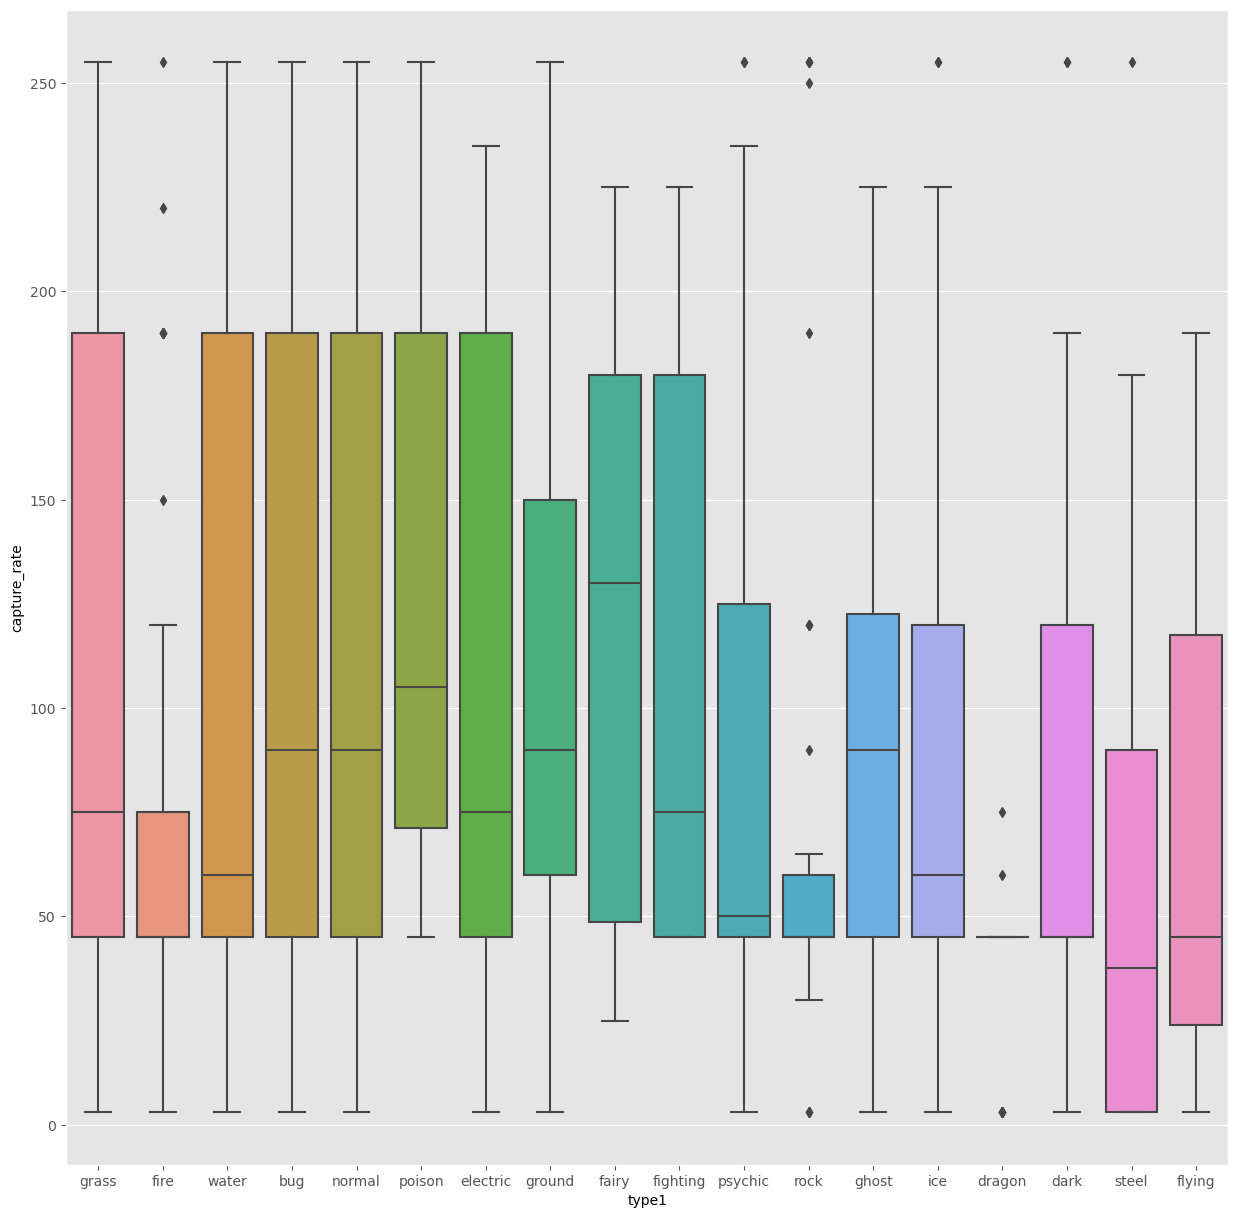

In [161]:
fig, ax = plt.subplots(figsize=(15,15))
sns.boxplot(data = df,y='capture_rate', x = 'type1')
plt.show()

- Tipo dragão apresenta o menor valor de **capture_rate**, então Pokemóns do tipo primário Dragão serão considerado os mais difíceis de se capturar;
- Os do tipo fada (fairy) possuem medianas maiores do que as dos outros tipos, então há indícios de que Pokemóns do tipo fada são mais fáceis de se capturar;
- Também observa-se a presença de outliers nos pokemons tipo fogo, psíquico, rocha, gelo, dark e aço com taxas de captura muito altas, ou seja, extremamente fáceis de se capturar;
- Outliers nos tipos Dragão e Rocha, com taxas de captura muito baixas, provavelmente pertencentes à Pokemóns lendários

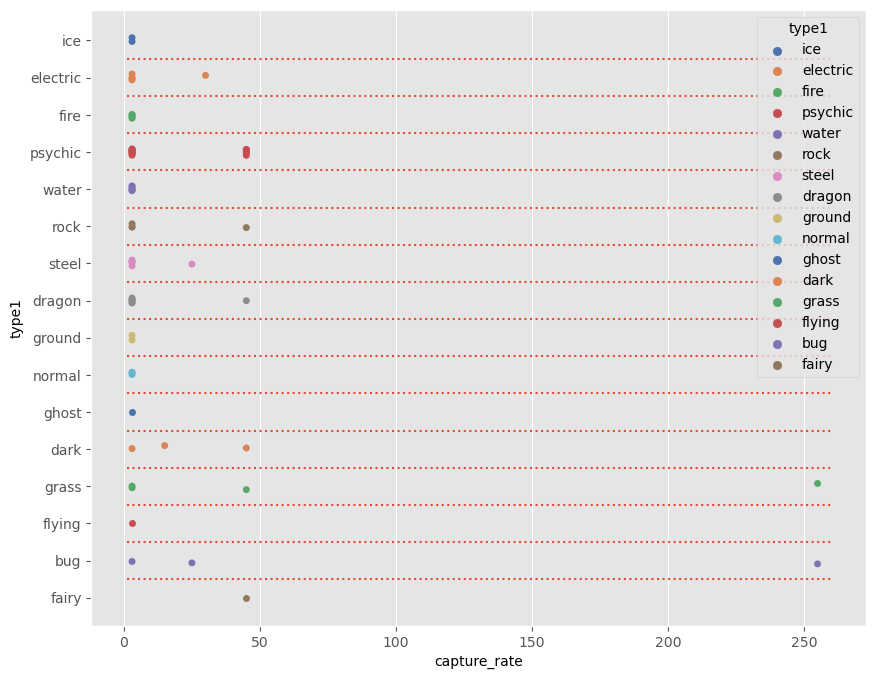

In [40]:
fig, ax = plt.subplots(figsize=(10,8))
sns.stripplot(data = df.loc[df.is_legendary == 1],y='type1', x = 'capture_rate', hue='type1', palette='deep')
plt.hlines(y = [i+0.5 for i in range(0,15)], xmin = 1, xmax = 260, linestyles = 'dotted')

- Todos os Pokemóns lendários, com exceção de 2, têm taxa de captura menor que 50. Assim, podemos concluir que Pokémons lendários são mais difíceis de se capturar.
- Vamos encontrar os 2 Pokemóns lendários que excepcionalmente possuem taxa de captura maior que 250.

In [41]:
outliers = df.loc[(df['is_legendary'] == 1) & (df['capture_rate'] > 250)]
outliers

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,defense,experience_growth,height_m,hp,name,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,num_abilities,Total
794,0.5,0.5,1.0,1.0,2.0,0.5,2.0,4.0,1.0,0.50,0.5,1.0,1.0,1.0,2.0,1.0,1.0,1.0,137,30720,0,570,255,37,1250000,1.8,71,Pheromosa,137,37,151,bug,fighting,25.0,7,1,1.0,21.50
797,1.0,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,0.25,1.0,1.0,0.5,0.0,0.5,0.5,0.5,0.5,181,30720,0,570,255,131,1250000,0.3,59,Kartana,59,31,109,grass,steel,0.1,7,1,1.0,16.25


- Qual a causa dessa maior facilidade de captura desses 2 Pokemóns lendários? Vamos comparar seus atributos base com a média dos atributos base dos Pokemóns lendários e não lendários

In [42]:
legendary = df.loc[df.is_legendary == 1]
non_legendary = df.loc[df.is_legendary == 0]
atributos = ['base_total', 'defense', 'hp', 'speed']

# Média dos atributos dos Pokemóns Lendários
display(legendary[atributos].describe())

,base_total,defense,hp,speed
count,70.000000,70.000000,70.000000,70.000000
mean,615.257143,99.400000,95.428571,95.428571
std,82.634990,26.929538,30.012351,24.671506
min,200.000000,31.000000,43.000000,37.000000
25%,580.000000,89.250000,80.000000,85.000000
50%,600.000000,100.000000,91.000000,98.000000
75%,680.000000,115.000000,103.750000,108.000000
max,780.000000,200.000000,223.000000,180.000000


In [43]:
# Média dos atributos dos Pokemóns Não-lendários
display(non_legendary[atributos].describe())

,base_total,defense,hp,speed
count,732.000000,732.000000,732.000000,732.000000
mean,410.603825,70.467213,66.415301,63.625683
std,106.078160,29.911868,24.788455,27.795901
min,180.000000,5.000000,1.000000,5.000000
25%,317.500000,50.000000,50.000000,43.000000
50%,419.000000,65.000000,65.000000,60.000000
75%,494.250000,85.000000,78.000000,81.250000
max,700.000000,230.000000,255.000000,160.000000


In [44]:
# Atributos dos Pokemóns Pheromosa e Kartana
display(outliers[atributos])

,base_total,defense,hp,speed
794,570,37,71,151
797,570,131,59,109


- Observando as tabelas vemos que esses dois Pokemóns lendários (Pheromosa e Kartana) possuem atributos de defesa (hp e defesa) menores do que a média dos Pokemóns lendários
- Destaca-se que eles possuem atributo de defesa base menores do que a média dos pokemóns não lendários e hp base muito próximo da média dos pokemóns não lendários
- Assim, conclui-se que um dos motivos desses 2 pokemóns terem taxa de captura tão alta são seus baixos atributos de defesa.

## 3.5) Análise Comparativa dos Pokemóns

In [104]:
lendario = df.loc[df.is_legendary == 1]
nao_lendario = df.loc[df.is_legendary == 0]

### Distribuições gerais das variáveis

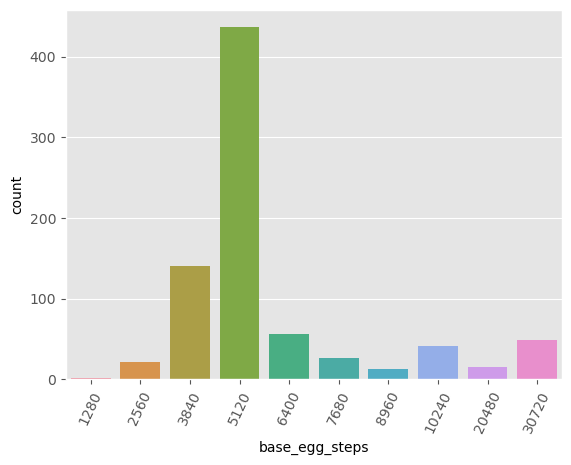

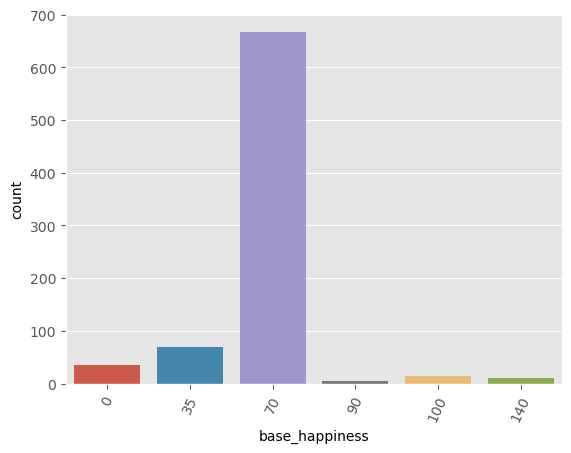

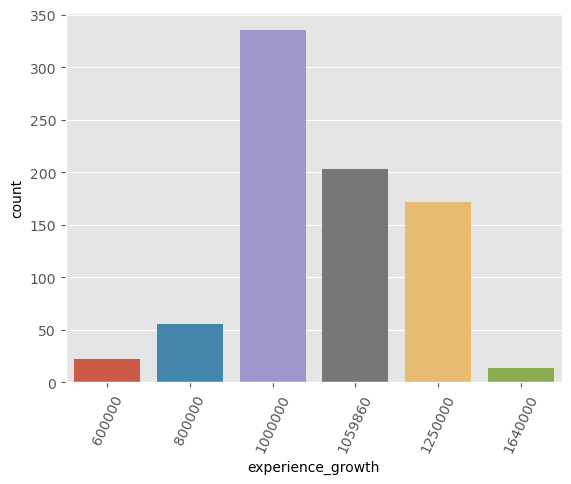

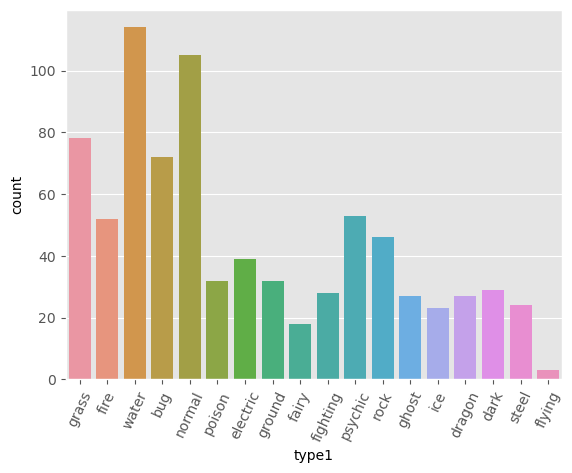

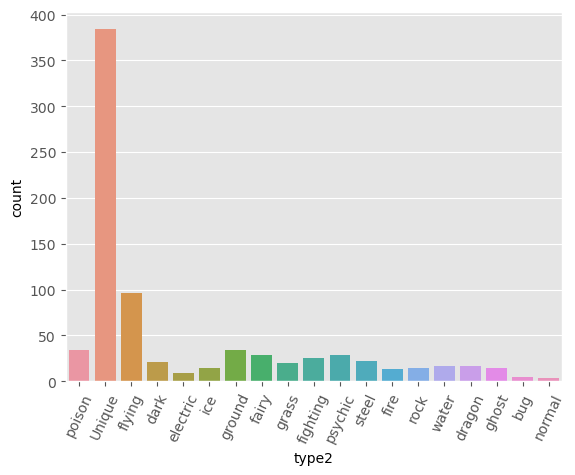

In [106]:
features = ['base_egg_steps', 'base_happiness', 'experience_growth', 'type1', 'type2']
for feature in features:
    sns.countplot(data = df, x = feature)
    plt.xticks(rotation = 65)
    plt.show()

### Tipos primários e secundários (Pokemons lendários)

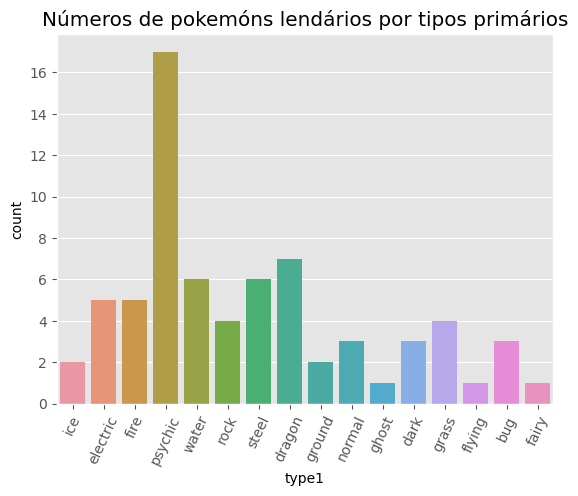

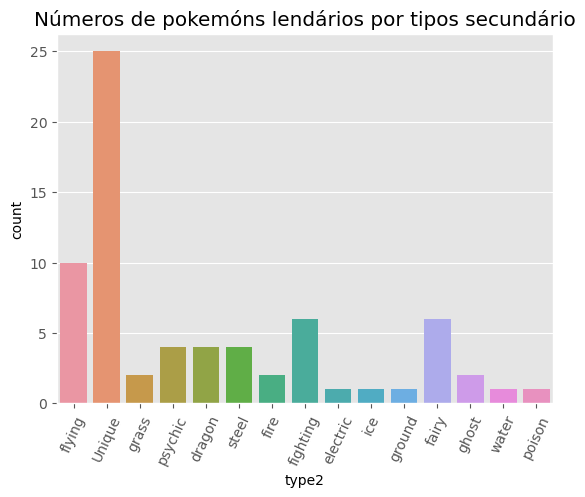

In [46]:
sns.countplot(data=lendario, x='type1').set(title = "Números de pokemóns lendários por tipos primários")
plt.xticks(rotation=65)
plt.show()

sns.countplot(data=lendario, x='type2').set(title = "Números de pokemóns lendários por tipos secundário")
plt.xticks(rotation=65)
plt.show()

- Maioria dos Pokemóns lendários é do tipo primário psíquico
- Maioria dos Pokemóns lendários não possui tipo secundário (type2 == None), seguido de tipo secundário voador

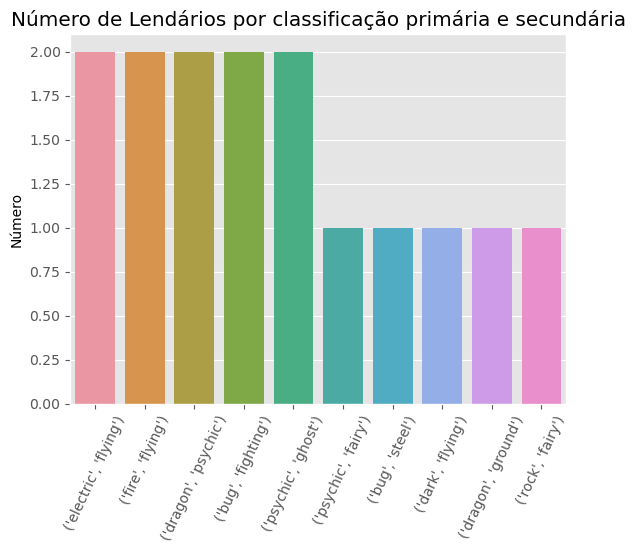

In [123]:
# Análise dos pokemons lendários com base na classificação conjunta de seus 2 tipos
join = lendario.loc[lendario.type2 != 'Unique']
tipo = pd.Series(list(zip(join.type1, join.type2))).value_counts(sort=True)


sns.barplot(y = tipo[:10], x = tipo.index[:10]).set(title = "Número de Lendários por classificação primária e secundária")
plt.ylabel("Número")
plt.xticks(rotation=65)
plt.show()

- Logo, podemos concluir que Pokémons lendários que possuem os dois tipos são do tipo primário: Elétrico, Fogo, Dragão, Inseto e Psíquico
- Além disso, embora o tipo primário de lendário mais comum seja o Psíquico e o secundário seja o Voador, um Pokémon lendário do tipo conjunto Psíquico + Voador não é o mais comum

### Tipos primários e secundários (Pokemóns não-lendários)

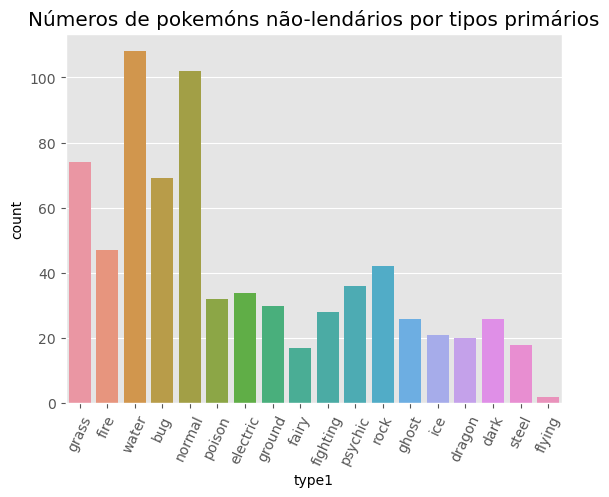

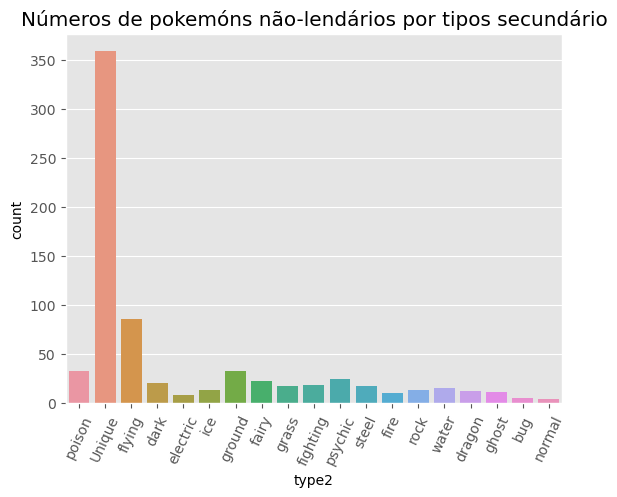

In [65]:
sns.countplot(data=nao_lendario, x='type1').set(title = "Números de pokemóns não-lendários por tipos primários")
plt.xticks(rotation=65)
plt.show()

sns.countplot(data=nao_lendario, x='type2').set(title = "Números de pokemóns não-lendários por tipos secundário")
plt.xticks(rotation=65)
plt.show()

- Pokemóns não-lendários mais comuns são o de água, normal e grama
- Maior parte dos Pokemóns não-lendários não possui um tipo secundário

### Número de passos

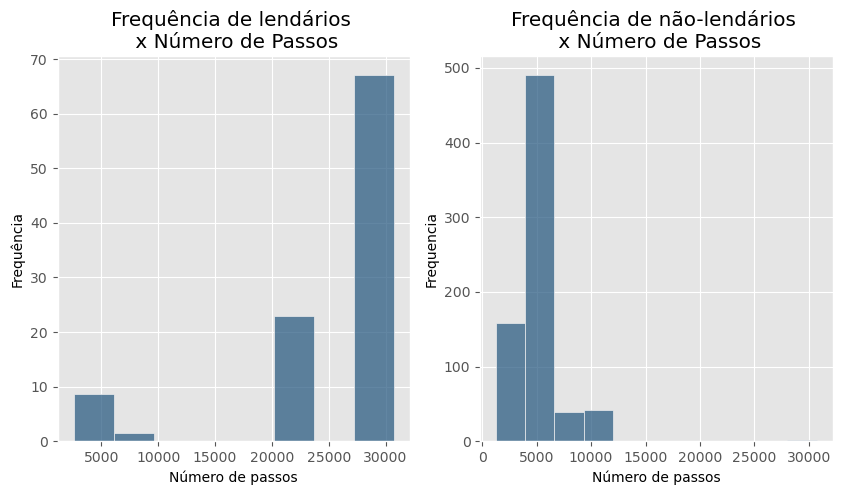

In [167]:
fig, ax = plt.subplots(1,2, figsize = (10,5))
sns.histplot(data=lendario, x='base_egg_steps', color = '#2d5d83', ax = ax[0], stat = 'percent'
            ).set(title = 'Frequência de lendários \n x Número de Passos', ylabel = 'Frequência', xlabel = 'Número de passos')
sns.histplot(data=nao_lendario, x='base_egg_steps', color = '#2d5d83', ax = ax[1], stat = 'count'
            ).set(title = 'Frequência de não-lendários \n x Número de Passos', ylabel = 'Frequencia', xlabel = 'Número de passos')
plt.show()

- Quase 70% dos Pokémons lendários precisam de 30720 passos para que seus ovos sejam chocados, o que não é surpresa já que um Pokémon lendário deveria ser mais trabalhoso de se obter.
- Já os Pokémons não-lendários precisam de menos passos para que seus ovos sejam chocados.

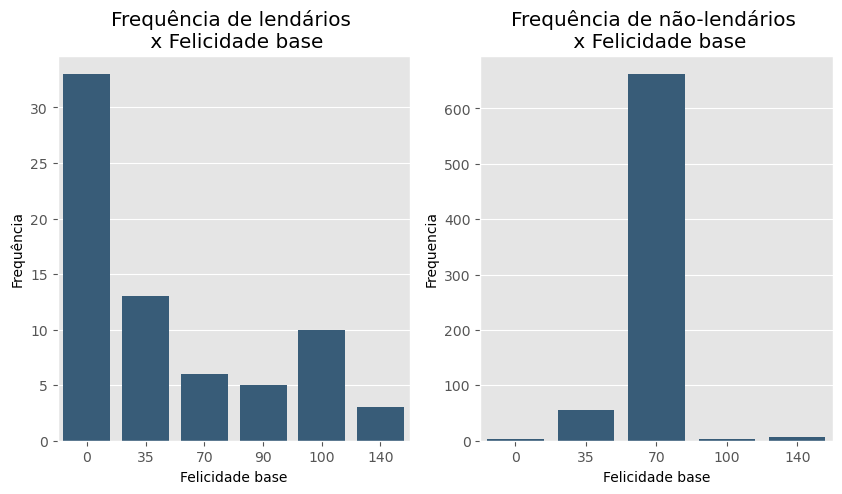

In [159]:
fig, ax = plt.subplots(1,2, figsize = (10,5))
sns.countplot(data=lendario, x='base_happiness', color = '#2d5d83', ax = ax[0]
            ).set(title = 'Frequência de lendários \n x Felicidade base', ylabel = 'Frequência', xlabel = 'Felicidade base')
sns.countplot(data=nao_lendario, x='base_happiness', color = '#2d5d83', ax = ax[1]
            ).set(title = 'Frequência de não-lendários \n x Felicidade base', ylabel = 'Frequencia', xlabel = 'Felicidade base')
plt.show()

- Maioria dos pokemons não-lendários possui níveis de felicidade base igual à 70.
- Grande maioria dos pokemons lendários possui felicidade base 0, assim podemos concluir que poder não traz felicidade.

## 3.6) Qual o Pokémon mais forte?

Se tomarmos como base de referência a variável base_total, temos que os 5 pokémons mais fortes são:

In [64]:
strongest1 = df.sort_values(by = 'base_total', ascending = False)[:10]
strongest1[['name', 'base_total', 'is_legendary']]

,name,base_total,is_legendary
149,Mewtwo,780,1
383,Rayquaza,780,1
382,Groudon,770,1
381,Kyogre,770,1
492,Arceus,720,1
717,Zygarde,708,1
372,Salamence,700,0
718,Diancie,700,1
375,Metagross,700,0
380,Latios,700,1


Vamos criar uma outra medida de referência para ver se obtemos o mesmo resultado. Se utilizarmos como referência o resultado da subtração entre base_total e Total que é o total de dano tomado contra todos os outros tipos de Pokémon

In [62]:
df['measure_strength'] = df['base_total'] - df['Total']
strongest2 = df.sort_values(by = 'measure_strength', ascending = False)[:10]
strongest2[['name', 'measure_strength', 'is_legendary']]

,name,measure_strength,is_legendary
149,Mewtwo,760.00,1
383,Rayquaza,759.75,1
381,Kyogre,752.00,1
382,Groudon,751.00,1
492,Arceus,702.00,1
717,Zygarde,687.50,1
375,Metagross,683.75,0
372,Salamence,679.75,0
718,Diancie,679.50,1
444,Garchomp,679.50,0


- Logo, ambas as medidas indicam que os 6 Pokemóns mais fortes são: Mewtwo, Rayquaza, Kyogre, Groudon, Arceus e Zygarde.
- Vemos que todos os 6 são Lendários, então há indícios de que Pokemóns lendários são mais fortes.
- Vamos grafar os boxplots das variáveis **base_total** e **measure_strength** para os grupos de lendários e não lendários:

<Axes: xlabel='is_legendary', ylabel='measure_strength'>

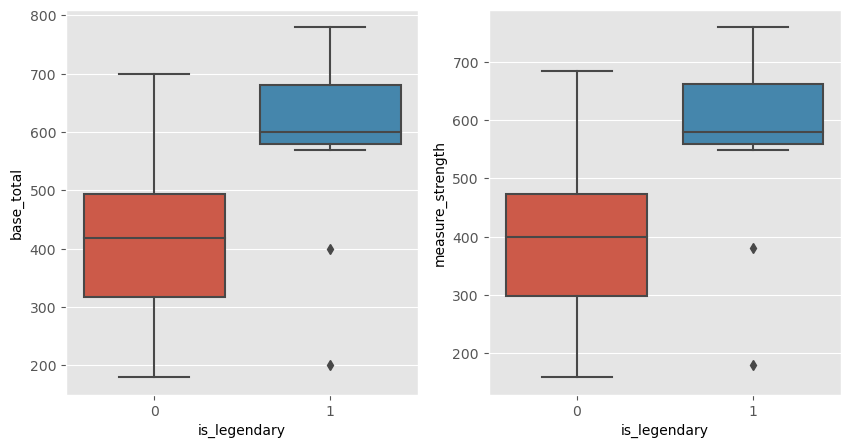

In [75]:
fig, ax = plt.subplots(1,2 , figsize=(10,5), sharey = False)
sns.boxplot(data = df, y='base_total', x = 'is_legendary', ax = ax[0])
sns.boxplot(data = df, y='measure_strength', x = 'is_legendary', ax = ax[1])

- Conclui-se que Pokémons lendários são, em geral, mais fortes do que Pokemóns não-lendários

## 4) Criando arquivo csv para dashboard
Por fim, vamos criar um arquivo .csv com os dados transformados presentes em df para criarmos nosso dashboard e relatório de dados.

In [59]:
import csv
df.to_csv('pokemon_transformado.csv', index = False)